<a href="https://colab.research.google.com/github/RicardxJMG/Data-projects/blob/main/Data%20Science%20Projects/Credit%20Card%20Clustering/Clustering_Tarjeta_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando los datos.
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
import pandas as pd
dataset = pd.read_csv('CC GENERAL.csv', sep = ',')

In [ ]:
dataset.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

---
**Información de los atributos**
---
- CUST_ID: Identificación del titular de la tarjeta de crédito (Categórico)
- BALANCE: Cantidad de saldo restante en su cuenta para hacer compras
- BALANCE_FREQUENCY: Con qué frecuencia se actualiza el saldo, puntuación entre 0 y 1 (1 = actualizado frecuentemente, 0 = no actualizado frecuentemente)
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- ONEOFF_PURCHASES: Monto máximo de una compra realizada en una sola vez
- INSTALLMENTS_PURCHASES: Cantidad de compras realizadas a plazos
- CASH_ADVANCE: Adelanto de efectivo proporcionado por el usuario
- PURCHASES_FREQUENCY: Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compran frecuentemente, 0 = no compran frecuentemente)
- ONEOFFPURCHASESFREQUENCY: Con qué frecuencia se realizan compras en una sola vez (1 = compran frecuentemente, 0 = no compran frecuentemente)
- PURCHASESINSTALLMENTSFREQUENCY: Con qué frecuencia se realizan compras a plazos (1 = se hacen frecuentemente, 0 = no se hacen frecuentemente)
- CASHADVANCEFREQUENCY: Con qué frecuencia se paga el adelanto de efectivo
- CASHADVANCETRX: Número de transacciones realizadas con "Adelanto de Efectivo"
- PURCHASES_TRX: Número de transacciones de compra realizadas
- CREDIT_LIMIT: Límite de crédito de la tarjeta para el usuario
- PAYMENTS: Cantidad de pagos realizados por el usuario
- MINIMUM_PAYMENTS: Monto mínimo de pagos realizados por el usuario
- PRCFULLPAYMENT: Porcentaje del pago total realizado por el usuario
- TENURE: Antigüedad del servicio de la tarjeta de crédito para el usuario


Borramos los atributos que no nos interesan como: CUST_ID y TENURE

In [ ]:
dataset.drop(columns=['CUST_ID','TENURE'], inplace=True)
dataset.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Analizando la calidad del dataset

In [ ]:
missing = dataset.isna().sum()
missing

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
dataset.fillna(dataset.median(), inplace=True)
missing = dataset.isna().sum()
missing

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


# Análisis Exploratorio

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", palette="twilight")

## Analizando distribución de los datos.

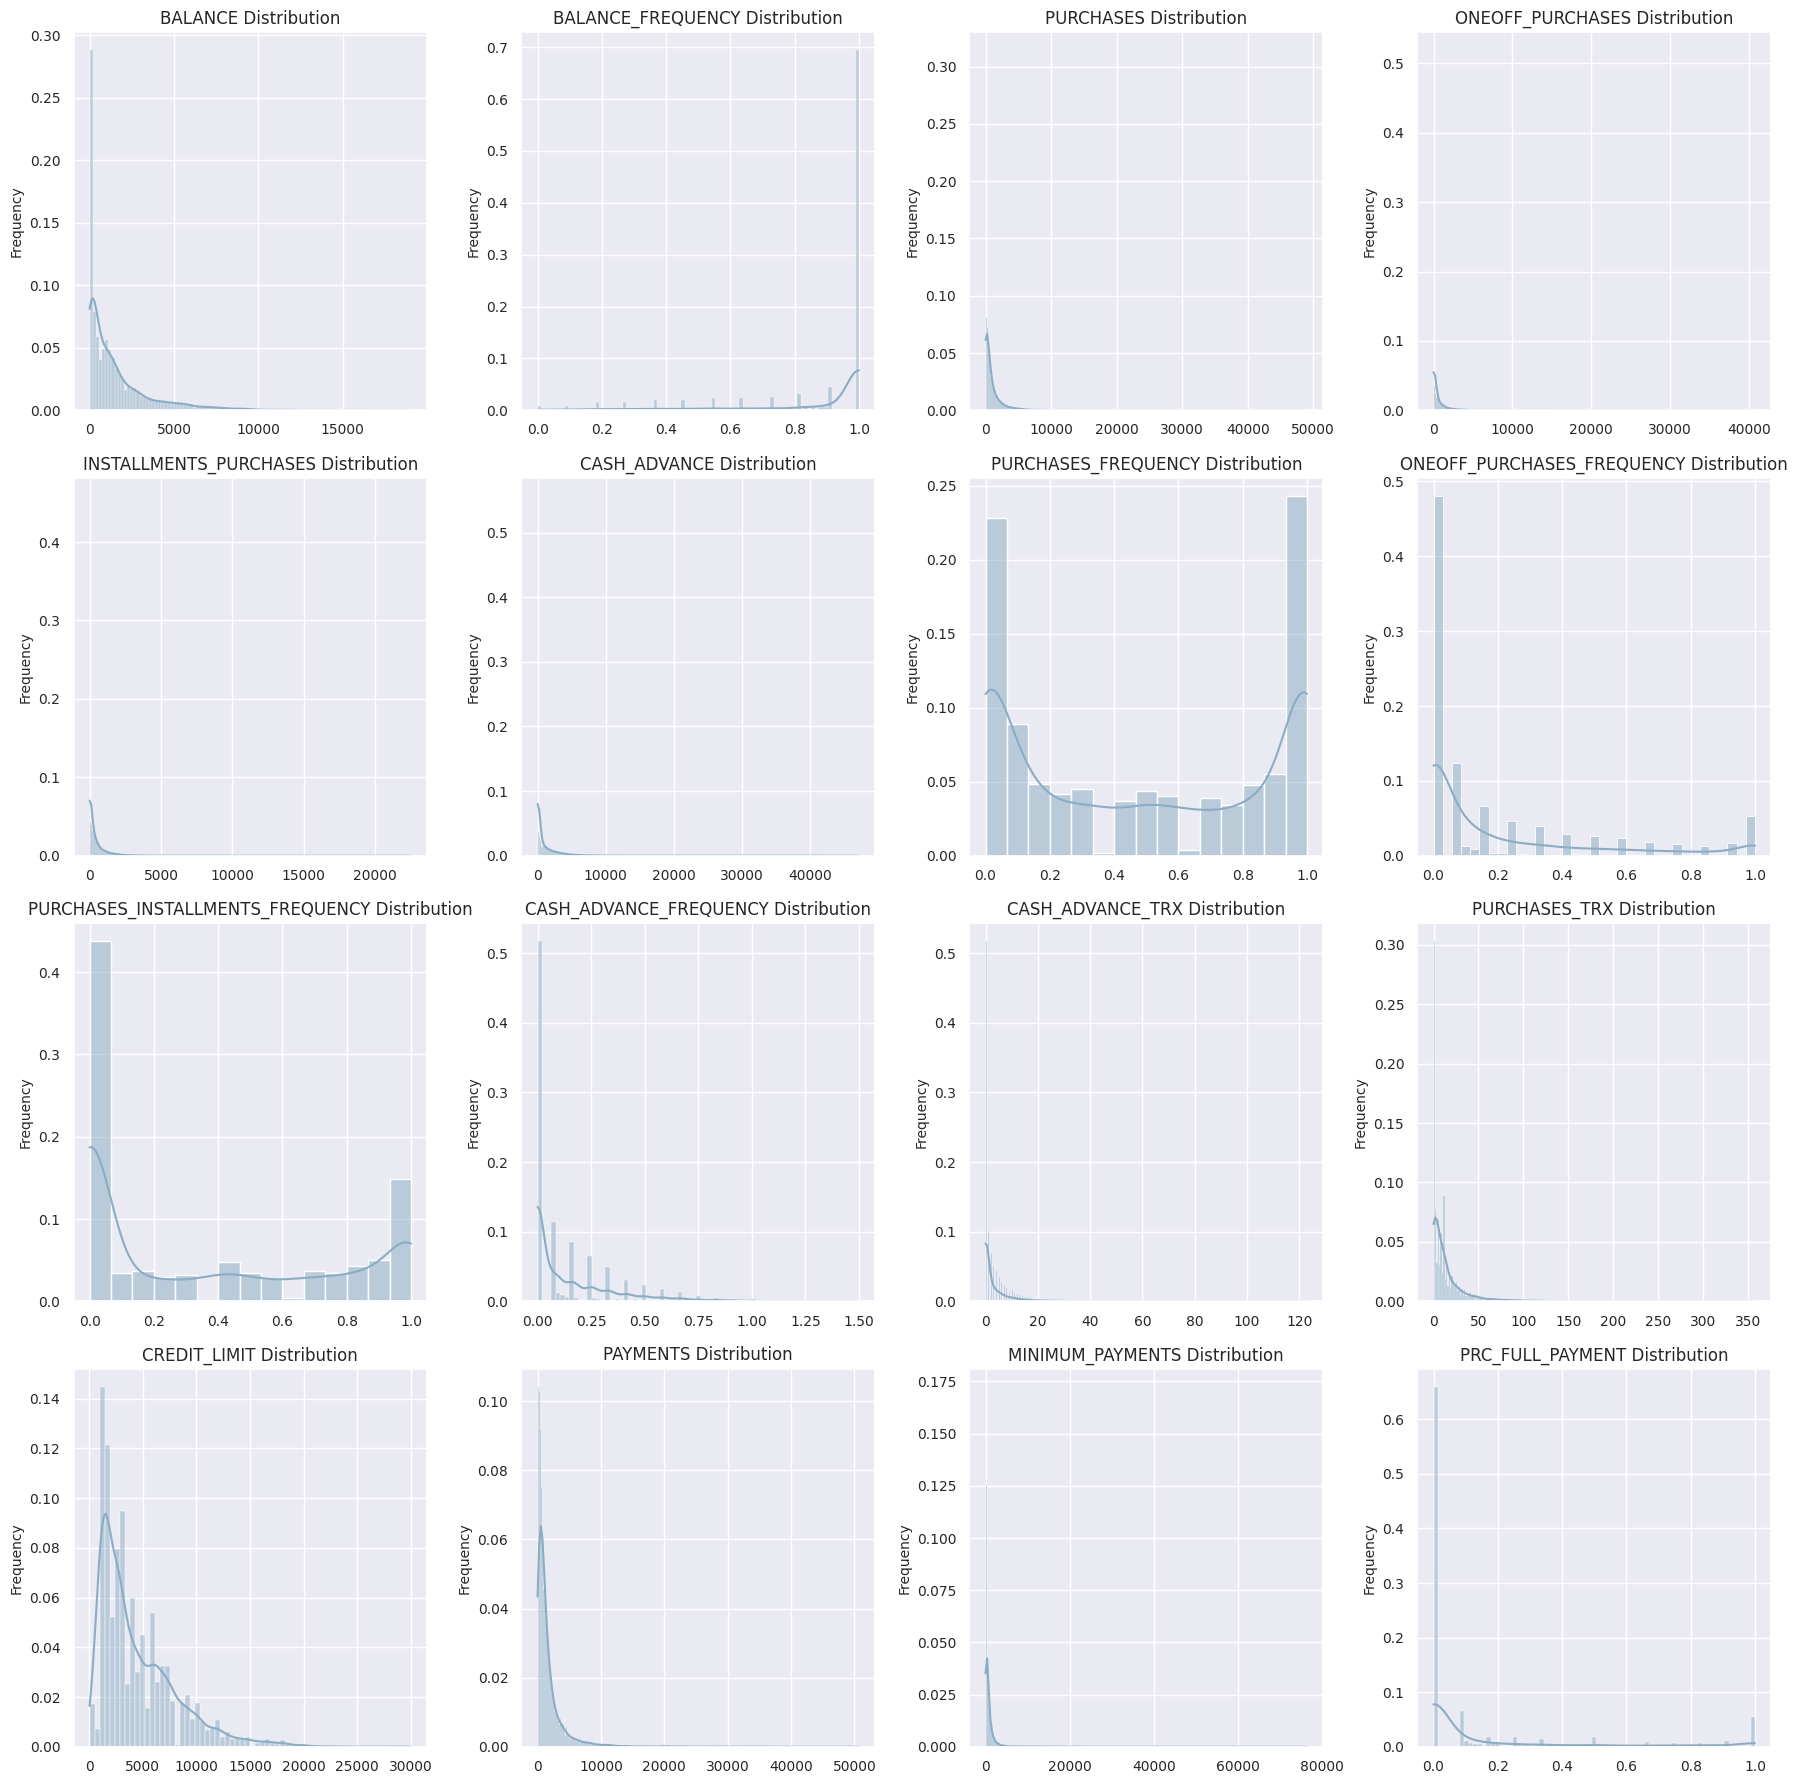

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))

for n, (col, ax) in enumerate(zip(dataset.columns, axes.flatten())):
    sns.histplot(data=dataset, x=col, kde=True, stat='probability', ax=ax)
    ax.set_title(f'{col} Distribution', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

> Notamos que no los dato no sigue una distribución fija.

## Analizando Outliers

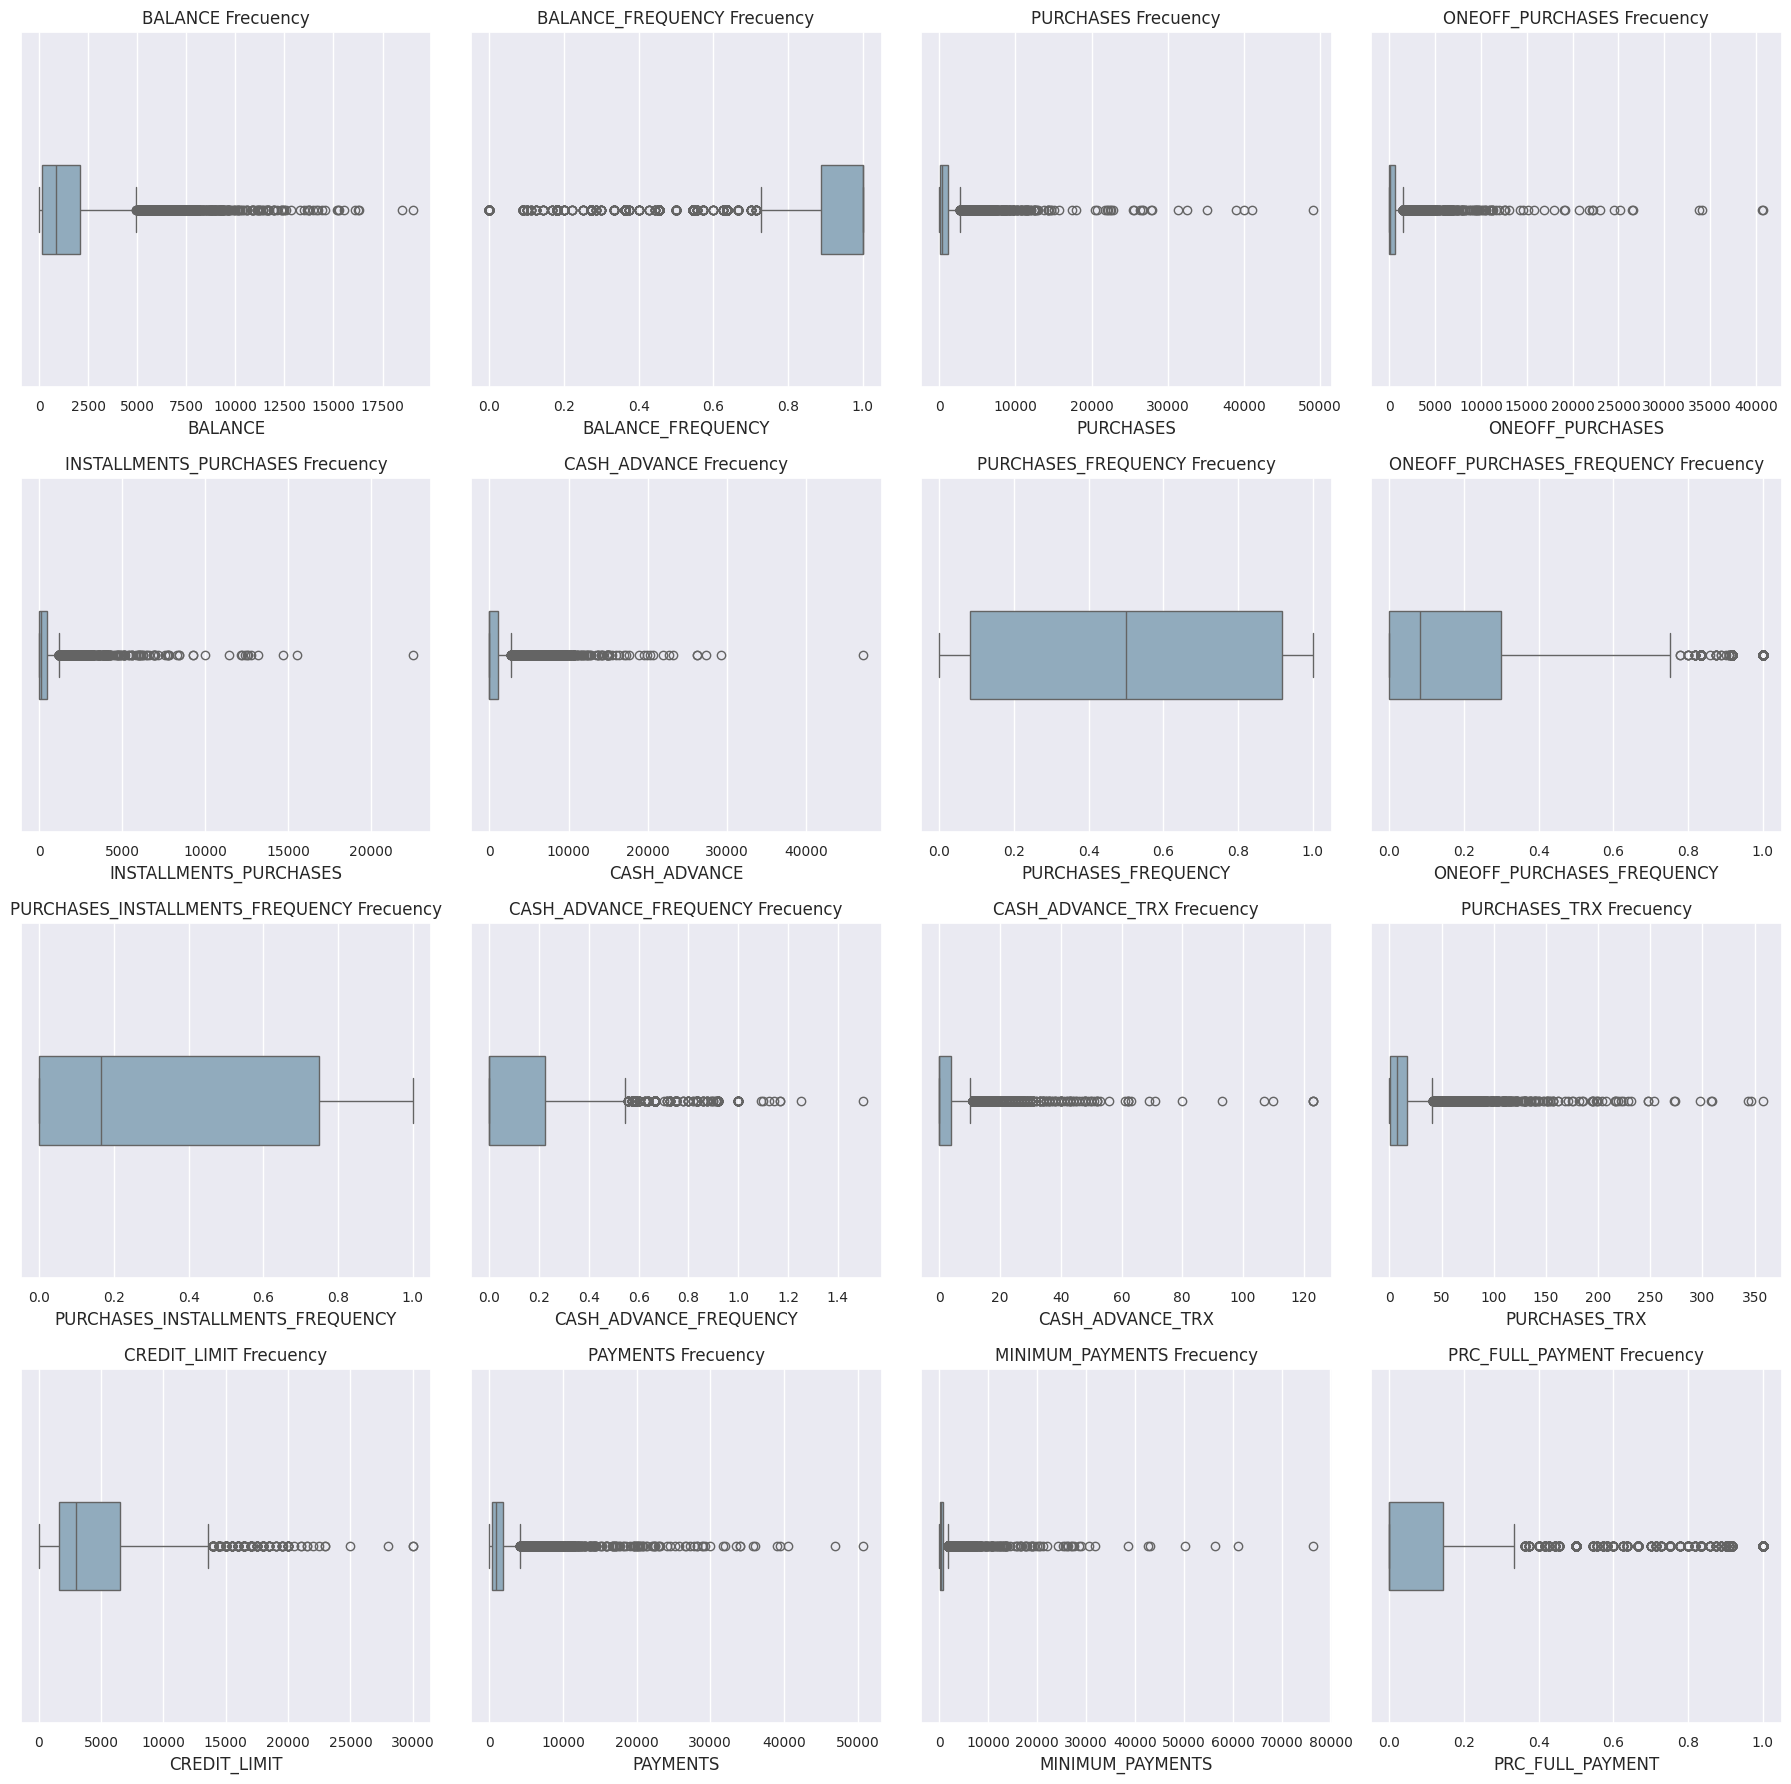

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))

for n, (col, ax) in enumerate(zip(dataset.columns, axes.flatten())):
    sns.boxplot(data=dataset[col], orient = 'h',width = 0.25, ax=ax)
    ax.set_title(f'{col} Frecuency', fontsize=12)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## Analisis de Frecuencias

In [ ]:
dataset.query('CASH_ADVANCE_FREQUENCY > 1')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
681,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0
1626,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0
2555,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0
2608,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0
3038,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0
3253,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0
8055,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0
8365,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0


In [ ]:
frecuencies = dataset[['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']]

In [ ]:
def ajuste(x):
  if x > 0.8: return 1
  elif x > 0.6: return 0.75
  elif x > 0.4: return 0.5
  elif x > 0.2: return 0.25
  else: return 0

<ipython-input-39-9d3b3076706f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frecuencies[col] = frecuencies[col].apply(ajuste)


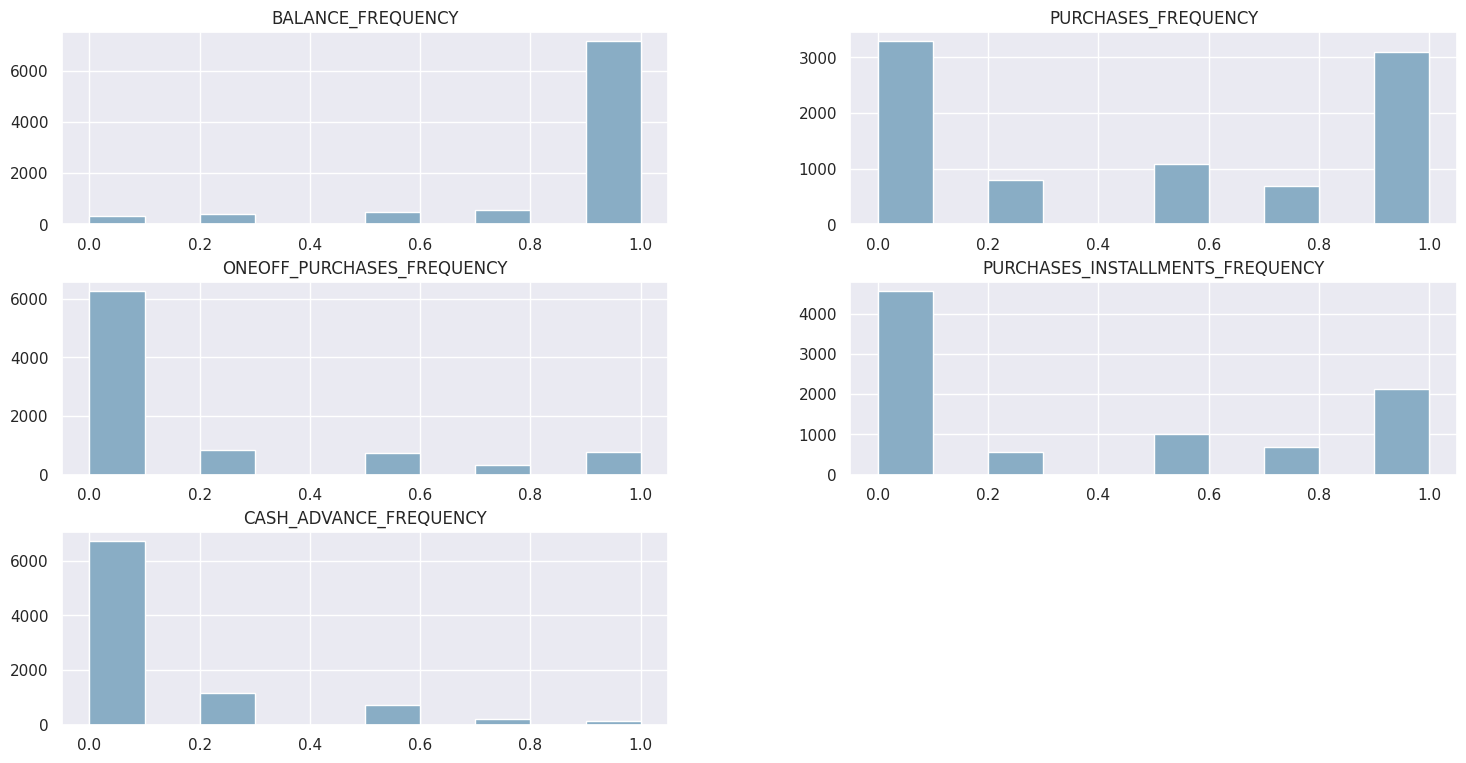

In [ ]:
for col in frecuencies.columns:
  frecuencies[col] = frecuencies[col].apply(ajuste)

frecuencies.hist(figsize=(18,9))
plt.show()

# Preprocesamiento de datos.

In [ ]:
cols_freq = frecuencies.columns

for col in cols_freq:
  dataset[col] = dataset[col].apply(ajuste)

In [ ]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataset.values)
values

array([[3.93555387e-02, 9.62220490e-04, 9.17958347e-02, ...,
        1.94178100e-01, 1.34239176e-01, 0.00000000e+00],
       [2.93875903e-01, 9.17654624e-05, 0.00000000e+00, ...,
        3.76516683e-01, 9.84037958e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733013e-02, 9.73273199e-04, 1.40540650e-01, ...,
        7.90986672e-02, 8.02155897e-02, 2.43318300e-04],
       [2.65257805e-02, 1.97106850e-03, 0.00000000e+00, ...,
        1.03579569e-01, 1.09898162e-01, 4.92767125e-04],
       [1.86406212e-01, 3.75104990e-04, 5.46778040e-01, ...,
        3.15915443e-02, 4.41568373e-02, 0.00000000e+00]])

# Validando y visualizando los *clusters*

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

scores= []

for s in range(2,16):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300, random_state=123)
  y_pred = kmeans.fit_predict(values)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Inertia'] = kmeans.inertia_
  score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
  scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Inertia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,2,1619.744131,0.299140,1.518087,3321.846160
1,3,1241.996106,0.327220,1.309607,3526.440254
2,4,1017.281434,0.348226,1.221602,3528.684205
3,5,876.289822,0.364439,1.075879,3431.782198
4,6,747.892341,0.364908,1.045463,3523.497004
5,7,677.145105,0.327837,1.150907,3398.392652
6,8,628.197723,0.309388,1.174121,3239.051066
7,9,587.686410,0.353650,1.126617,3106.247645
8,10,549.869366,0.350204,1.121032,3018.982722
9,11,515.623135,0.304461,1.145998,2956.591619


> Para seleccionar el mejor numero de clusters se debe tener las siguienters consideraciones.
* Silhouette Score -> mayor que cero y debe ser el mayor numero entre otros lo más cecrcano a 1.
* Davies-Boundin Score -> Minimo valor que se acerque al cero.
- Caliski - Harabasz -> El valor más grande.

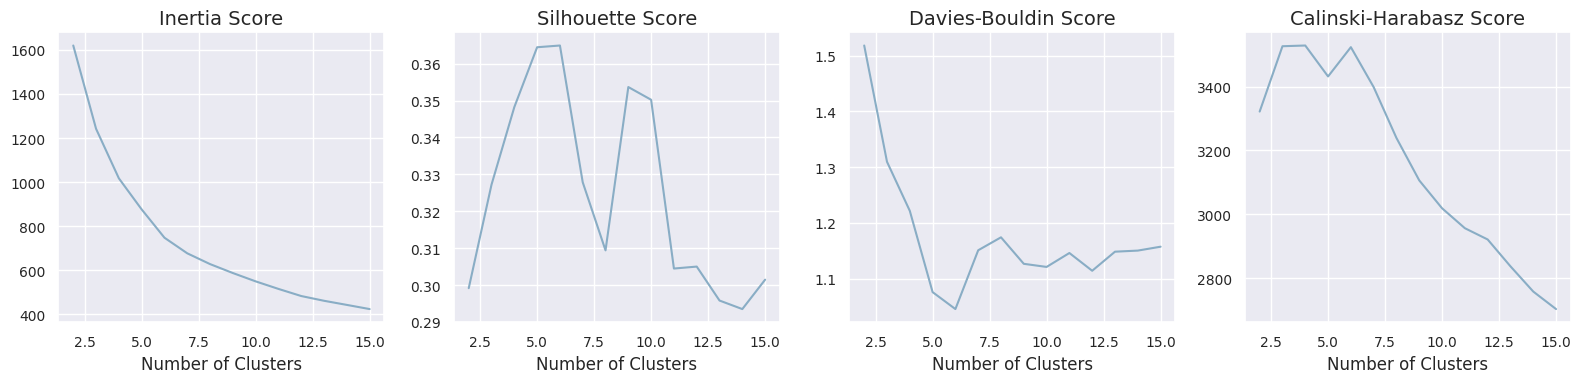

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for n, (col, ax) in enumerate(zip(table.drop(columns=['N_Clusters']).columns, axes.flatten())):
    sns.lineplot(data=table, x='N_Clusters', y=col, ax=ax)
    ax.set_title(f'{col} Score', fontsize=14)
    ax.set_xlabel('Number of Clusters', fontsize =12)
    ax.set_ylabel('')
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

> Notamos que el mejor número de clusters es 6.

### Estabilidad de clusters

In [ ]:
import numpy as np

set1,set2,set3 = np.array_split(values,3)
sets = [set1,set2,set3 ]

scores= []
n=1
for set_ in sets:
  score={}
  kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(set_)
  labels = kmeans.labels_
  score['Set'] = f'set{n}'
  n += 1
  score['Silhouette'] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)

estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.363873,1.024620,1192.356302
1,set2,0.364442,1.062908,1169.459561
2,set3,0.372281,1.041536,1184.794402


In [ ]:
kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_


# Entendiendo los valores de los atributos en los *clusters*

In [ ]:
dataset.shape

(8950, 16)

In [ ]:
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns= dataset.columns)
round(centroids.var(),3).sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,0.065
CREDIT_LIMIT,0.042
CASH_ADVANCE,0.041
PAYMENTS,0.036
BALANCE,0.030
PURCHASES,0.022
ONEOFF_PURCHASES,0.008
INSTALLMENTS_PURCHASES,0.004
ONEOFF_PURCHASES_FREQUENCY,0.000
PURCHASES_FREQUENCY,0.000


In [ ]:
dataset['CLUSTER']=labels
description = round(dataset.groupby('CLUSTER')[['PURCHASES','BALANCE','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']].mean(),2)
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
CLUSTER,,,,,,
0,238.96,2429.89,3106.66,4475.07,975.00,796.72
1,628.78,418.04,119.40,5132.73,816.71,220.68
2,528.09,1765.93,3088.66,3950.84,4997.17,746.80
3,519.33,3242.27,762.76,4418.18,1052.05,1150.06
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32
5,3330.06,1118.42,185.88,4111.62,3052.73,537.75


In [ ]:
description['N_CUSTOMERS'] = dataset.CLUSTER.value_counts()
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,238.96,2429.89,3106.66,4475.07,975.00,796.72,1143
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,528.09,1765.93,3088.66,3950.84,4997.17,746.80,980
3,519.33,3242.27,762.76,4418.18,1052.05,1150.06,1796
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
5,3330.06,1118.42,185.88,4111.62,3052.73,537.75,1486


# Interpretando los *clusters*

Recordando que significan las variables por analizar:
- BALANCE: Cantidad de saldo restante en su cuenta para hacer compras
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- CASH_ADVANCE: Adelanto de efectivo proporcionado por el usuario
- CREDIT_LIMIT: Límite de crédito de la tarjeta para el usuario
- PAYMENTS: Cantidad de pagos realizados por el usuario
- MINIMUM_PAYMENTS: Monto mínimo de pagos realizados por el usuario

In [ ]:
description

,PURCHASES,BALANCE,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,N_CUSTOMERS
CLUSTER,,,,,,,
0,238.96,2429.89,3106.66,4475.07,975.00,796.72,1143
1,628.78,418.04,119.40,5132.73,816.71,220.68,3203
2,528.09,1765.93,3088.66,3950.84,4997.17,746.80,980
3,519.33,3242.27,762.76,4418.18,1052.05,1150.06,1796
4,856.28,1959.06,451.82,2198.68,1339.89,6865.32,342
5,3330.06,1118.42,185.88,4111.62,3052.73,537.75,1486


De la tabla anterior, notamos diferencias importantes en los seis clusters para diferenciar a los clientes:


- **Cluster 0 – Clientes dependientes del efectivo**

  - Bajo nivel de compras pero alto uso de adelantos en efectivo.
  - Balance alto y pagos bajos en relación al efectivo utilizado.
  - Podrían estar experimentando dificultades para manejar el crédito eficientemente.


- **Cluster 1 – Clientes de bajo uso**

  - Compras, balance y efectivo utilizados muy bajos.
  - Monto mínimo de pagos bajo, pero consistente con su bajo uso general.
  - Son usuarios conservadores, posiblemente con poco interés en crédito.


- **Cluster 2 – Clientes intensivos en efectivo**

  - Uso alto de adelantos en efectivo con bajo uso de compras.
  - Realizan pagos frecuentes, pero su mínimo requerido también es elevado.
  - Representan un riesgo moderado por su alta dependencia de efectivo.


- **Cluster 3 – Clientes con alto saldo y pagos equilibrados**

  - Balance más alto del grupo, con uso moderado de efectivo.
  - Pagan de forma consistente y cumplen con sus mínimos.
  s- Perfil más balanceado, podrían ser considerados de riesgo medio-bajo.


- **Cluster 4 – Clientes endeudados con alto pago mínimo**

  - Compras relativamente altas, pero crédito limitado y bajo efectivo usado.
  - Destaca por un muy alto monto de pagos mínimos requeridos.
  - Puede indicar acumulación de deuda o problemas financieros.


- **Cluster 5 – Clientes compradores frecuentes**

  - Mayor volumen de compras,
  - Uso de efectivo bajo.
  - Hacen muchos pagos, probablemente mantienen una buena relación con su crédito.

In [ ]:
dataset.groupby('CLUSTER')['PRC_FULL_PAYMENT'].mean()

,PRC_FULL_PAYMENT
CLUSTER,
0,0.008869
1,0.252640
2,0.128571
3,0.000097
4,0.022729
5,0.284290
